In [ ]:
# Import dependancies 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
dataset = pd.read_csv('../datasets/taxstats2015individual28countaveragemedianbypostcode.csv')
dataset.head()

Postcode  Count taxable income or loss  Average taxable income or loss  \
0      2000                         36185                           47723   
1      2006                            83                           80905   
2      2007                          4769                           46549   
3      2008                          5607                          108816   
4      2009                          9726                           82938   

   Median taxable income or loss  Count salary and wages  \
0                          18213                   31293   
1                          58150                      74   
2                          31474                    4153   
3                          41151                    5008   
4                          50604                    8167   

   Average salary and wages  Median salary and wages  Count net rent  \
0                     38710                    17992            3614   
1                     82733                    67658              21   
2                     47386                    34366             548   
3                     53418                    42892             612   
4                     74068                    55243            1714   

   Average net rent  Median net rent  ...  Median total business income  \
0               558              207  ...                         19684   
1              1042             -807  ...                         42054   
2             -1242             -794  ...                         19960   
3              1818            -1728  ...                         19722   
4             -2412            -1520  ...                         26044   

   Count  total business expenses  Average total business expenses  \
0                            1331                           222191   
1                               4                            48971   
2                             334                           639499   
3                             481                            32173   
4                             666                           222993   

   Median total business expenses  Count net tax  Average net tax  \
0                           20773          17264            27555   
1                           18508             67            28142   
2                            9233           3071            15649   
3                            9385           4061            53976   
4                           11982           7358            32430   

   Median net tax  Count super total accounts balance  \
0            5917                               51394   
1           19359                                 137   
2            9115                                6711   
3           10583                                7676   
4           14835                               12718   

   Average super total accounts balance  Median super total accounts balance  
0                                 68531                                 1110  
1                                 90315                                15544  
2                                 41670                                 5225  
3                                 54245                                10373  
4                                126486                                20494  

[5 rows x 28 columns]

In [19]:
import math
import pandas as pd
import matplotlib.pyplot as plt

def PearsonCoefficient(Data, Print):
    #Passed in Data must be a 2-dimensional array of vector 2s in the form [X, Y], [X, Y], ...

    #Pearson correlation coefficient calculations
    #Calculating the averages of each x and y components in the data set
    x_average = 0
    y_average = 0
    x_sum = 0
    y_sum = 0

    for value in Data:
        x_sum += value[0]
        y_sum += value[1]

    x_average = x_sum / Data.__len__()
    y_average = y_sum / Data.__len__()

    #Calculating the numerator and denominator for the Pearson correlation coefficient
    numerator_sum = 0
    denominator_square_sum_x = 0
    denominator_square_sum_y = 0

    for value in Data:
        numerator_sum += (value[0] - x_average) * (value[1] - y_average)
        denominator_square_sum_x += (value[0] - x_average)**2
        denominator_square_sum_y += (value[1] - y_average)**2

    denominator = math.sqrt(denominator_square_sum_x * denominator_square_sum_y)

    #Calculating the coefficient
    r = numerator_sum / denominator

    #Calculating regression line
    #Regression line follows formula: y = mx + b
    m = r * (y_sum / x_sum)
    b = y_average - (m * x_average)

    if Print == True:
        print("Pearson correlation coefficient: " + r.__str__())
        print("Gradient: " + m.__str__())
        print("y-intercept: " + b.__str__())

        plt.scatter(dataset[x_axis], dataset[y_axis])
        plt.plot(dataset[x_axis], m * dataset[x_axis] + b, color='red')
        plt.xlabel(x_axis)
        plt.ylabel(y_axis)
        plt.show()

    return r

y_axis = 'Average net tax'
dataset = pd.read_csv('../datasets/taxstats2015individual28countaveragemedianbypostcode.csv')

#use this to find the column with the greatest coefficient of correlation
'''
highest_correlation_value = 0
highest_correlation_category = ''

for column in dataset.columns:
    if (column != 'Average net tax' and pd.api.types.is_numeric_dtype(dataset[column])):
        x_axis = column

        Data = dataset[[x_axis, y_axis]].values

        pearson_coefficient = PearsonCoefficient(Data, False)

        if (abs(pearson_coefficient) > highest_correlation_value):
            highest_correlation_value = pearson_coefficient
            highest_correlation_category = column

print(highest_correlation_category)
print(highest_correlation_value)
'''

#use this to show the graph of chosen axis
'''
x_axis = 'Average total income or loss' #Average total income or loss is the highest
y_axis = 'Average net tax'
Data = dataset[[x_axis, y_axis]].values

PearsonCoefficient(Data, True)
'''

#From the information that is printed, we can see that my line equation is approximately: y = 0.27x + 506

#use this to calculate loss:
#'''
#Hardcoded function for the line equation. Must be manually changed if the graph is changed
def line_equation(x):
    return -10 * x + 80000

x_axis = 'Postcode' #Average total income or loss is the highest
y_axis = 'Average net tax'
Data = dataset[[x_axis, y_axis]].values

L1_loss = 0
L2_loss = 0

for point in Data:
    x, y = point
    L1_loss += abs(y - line_equation(x))
    L2_loss += (y - line_equation(x))**2

MAE = L1_loss / dataset.__len__()
MSE = L2_loss / dataset.__len__()

print(f"L1_loss: {L1_loss}\nMAE: {MAE}\n\nL2_loss: {L2_loss}\nMSE: {MSE}")

#'''

L1_loss: 61106618
MAE: 24709.50990699555

L2_loss: 1999895075746
MSE: 808691902.849171


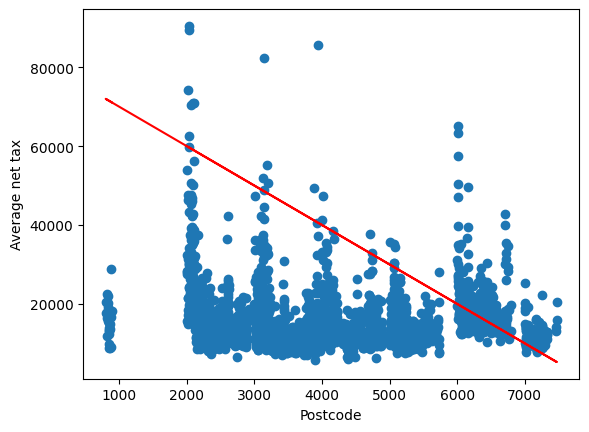

In [ ]:

def y(x):
    ''' This simple function takes a postcode and returns the average net tax. 
    It does a poor job!'''
    return -10*x + 80000

plt.scatter(dataset['Postcode'], dataset['Average net tax'])
plt.xlabel('Postcode')
plt.ylabel('Average net tax')

predicted_y = y(dataset['Postcode']) #Here we use the function to predict y values based on x values
plt.plot(dataset['Postcode'], predicted_y, color='red')

plt.show()